In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
exams_df = pd.read_csv('dataset/exams_processed.csv')
exams_df.sample(5)

,parental level of education,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_male,lunch_standard,test preparation course_none
89,4,0.074797,0.637632,0.857758,0,1,0,0,0,1,0
40,0,-0.764046,-1.212640,-1.102445,0,1,0,0,1,1,1
65,0,0.843736,0.424139,0.249419,1,0,0,0,1,0,1
42,5,-0.274721,0.281811,0.046639,0,0,1,0,0,1,1
30,2,-2.092214,-1.141475,-1.440411,0,1,0,0,0,0,1


In [25]:
x = exams_df.drop('math score', axis = 1)
y = exams_df['math score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [26]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((80, 10), (80,), (20, 10), (20,))

In [27]:
linear_model = LinearRegression(fit_intercept = True).fit(x_train, y_train)

In [28]:
print('Training Score: ', linear_model.score(x_train, y_train))

Training Score:  0.8928617398304756


In [29]:
y_pred = linear_model.predict(x_test)

In [30]:
print('Testing Score: ', r2_score(y_test, y_pred))

Testing Score:  0.8326169683788229


In [31]:
linear_model = LinearRegression(fit_intercept = False).fit(x_train, y_train)

print('Training Score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing Score: ', r2_score(y_test, y_pred))

Training Score:  0.8745205632390083
Testing Score:  0.7670076835587532


In [32]:
df_pred = pd.DataFrame({'predictions' : y_pred,
                        'Actual value': y_test
                       })
df_pred

,predictions,Actual value
79,0.621378,0.354411
41,-1.240700,-1.113564
95,-0.754042,-0.694142
82,0.285562,0.074797
62,-0.580898,-0.764046
76,0.855647,0.703929
3,0.012794,0.494218
73,-0.283710,-0.274721
25,0.018722,-0.344625
33,-1.337418,-1.113564


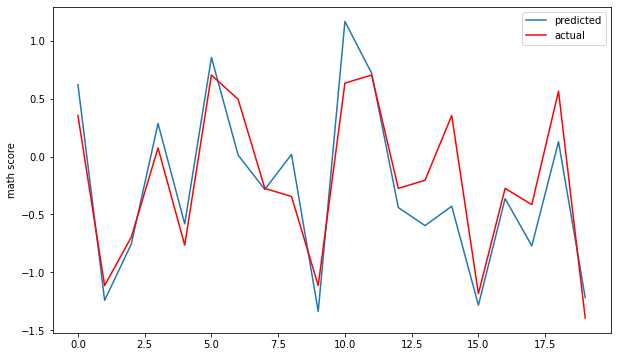

In [34]:
plt.figure(figsize = (10, 6))
plt.plot(y_pred, label = 'predicted')
plt.plot(y_test.values, label= 'actual', color = 'r')
plt.ylabel('math score')
plt.legend()

In [36]:
x = exams_df.drop(['math score','reading score', 'writing score'], axis = 1)
y = exams_df['math score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

linear_model = LinearRegression(fit_intercept = True).fit(x_train, y_train)
print('Training Score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print('Testing Score: ', r2_score(y_test, y_pred))

Training Score:  0.30943682385805804
Testing Score:  0.09583010811584869


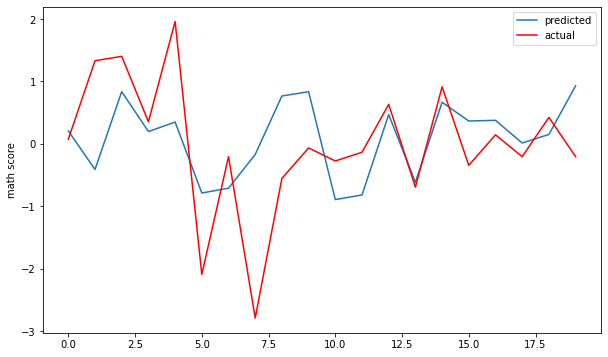

In [37]:
plt.figure(figsize = (10, 6))
plt.plot(y_pred, label = 'predicted')
plt.plot(y_test.values, label= 'actual', color = 'r')
plt.ylabel('math score')
plt.legend()